# Глава 11

## Задание 11.3.

Вернуться к примеру "Соло на барабане", применить фильтр НЧ до выборки, с помощью фильтра НЧ удалить спектральные копии, вызванные выборкой. Определить идентичен ли результат отфильтрованному сигналу.

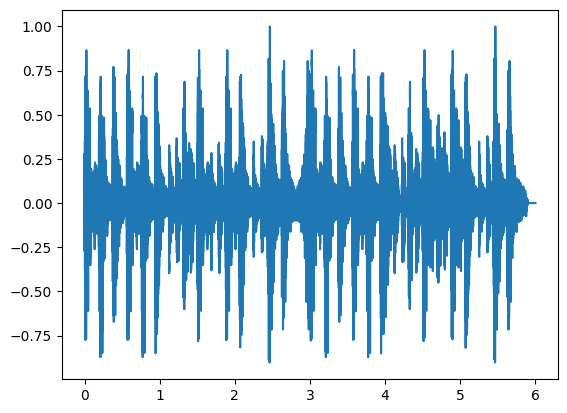

In [6]:
from thinkdsp import read_wave
from thinkdsp import Wave
import numpy as np

wave = read_wave('code_263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()

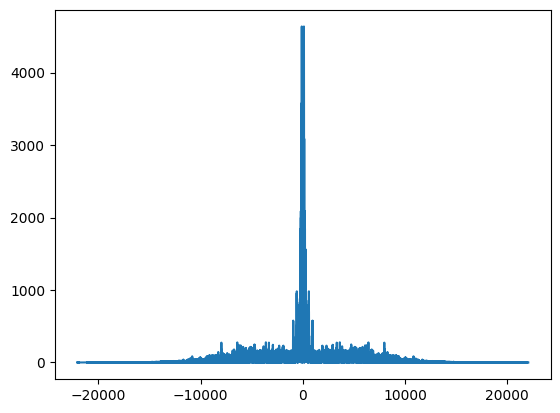

In [7]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Отфильтруем сигнал и выведем его спектр

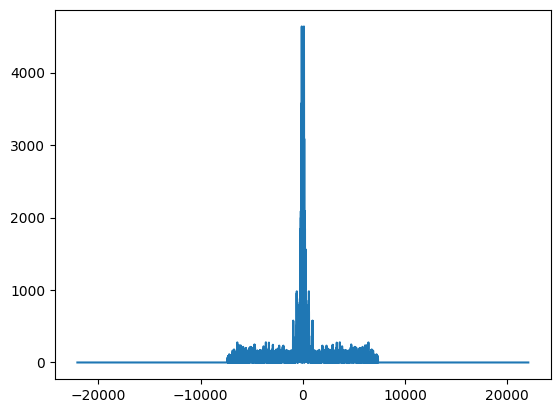

In [8]:
factor = 3
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1
spectrum.low_pass(cutoff)
spectrum.plot()

Ниже приведена функция, имитирующая процесс выборки

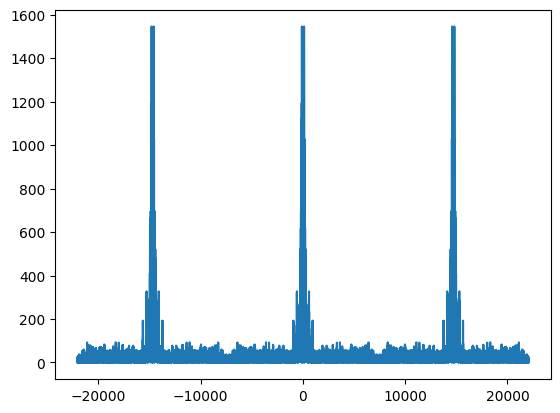

In [10]:
filtered = spectrum.make_wave()

def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate)
sampled = sample(filtered, factor)
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

Избавиться от спектральных копий можно путем примения фильтра сглаживания

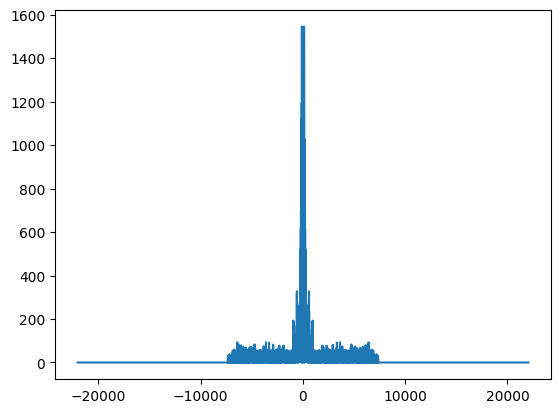

In [11]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

Можно заметить, что энергия в спектре уменьшилась, однако после применения масштабирования можно вернуть ее к прежним значениям

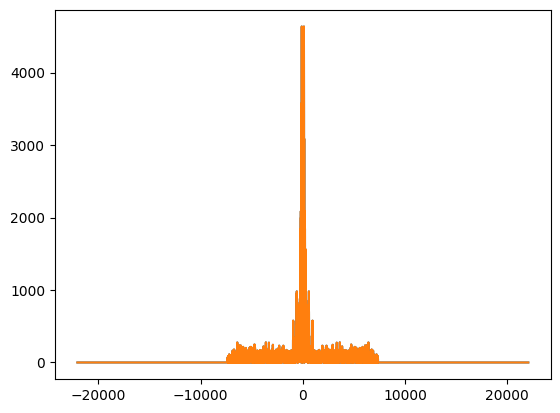

In [12]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

Можно заметить, что теперь разница между спектрами до и после выборки визуально не заметна.

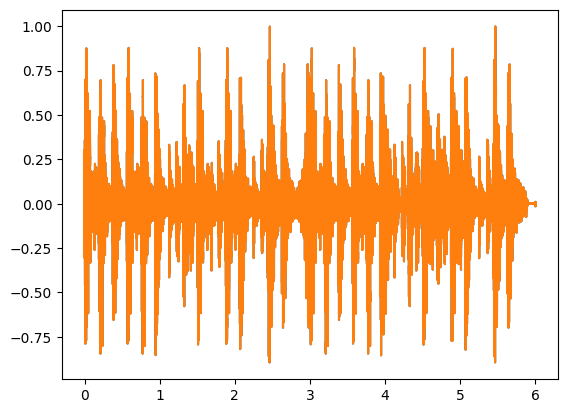

In [13]:
interpolated = sampled_spectrum.make_wave()
filtered.plot()
interpolated.plot()

In [14]:
filtered.max_diff(interpolated)

np.float64(5.658995448385304e-16)

Можно заметить, что результат почти идентичен отфильтрованному сигналу.